In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.describe() 

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [4]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df1 = df.copy()

In [7]:
df.shape    # Rows - 76014 , Columns - 15

(76014, 15)

In [8]:
df.drop(['mid','venue','batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [9]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [10]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

### Keeping Only Consistent Teams

In [11]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
        'Sunrisers Hyderabad']

In [12]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [13]:
df['bat_team'].replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)
df['bowl_team'].replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

In [14]:
df['bat_team'].unique()    # checking after removing unconsistent teams

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Sunrisers Hyderabad'], dtype=object)

#### Removing the first 5 overs 

In [15]:
df = df[df['overs']>=5.0]

In [16]:
df.head(20)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
37,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.6,58,1,222
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222


In [17]:
df.dtypes    # checking the datatype

date               object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

### Inference
1) As we see date is in string we have to convert it to data

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df.dtypes 

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [20]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


### EDA

### Seprating Catagorical and Numerical Columns

In [21]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['bat_team', 'bowl_team'], dtype='object')
Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total'],
      dtype='object')


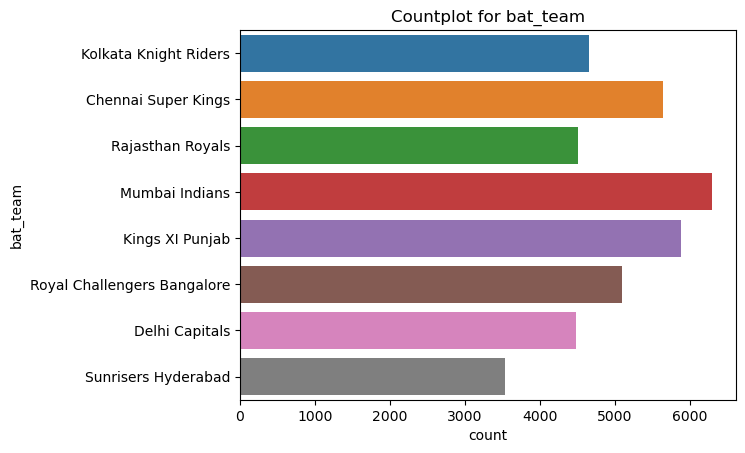

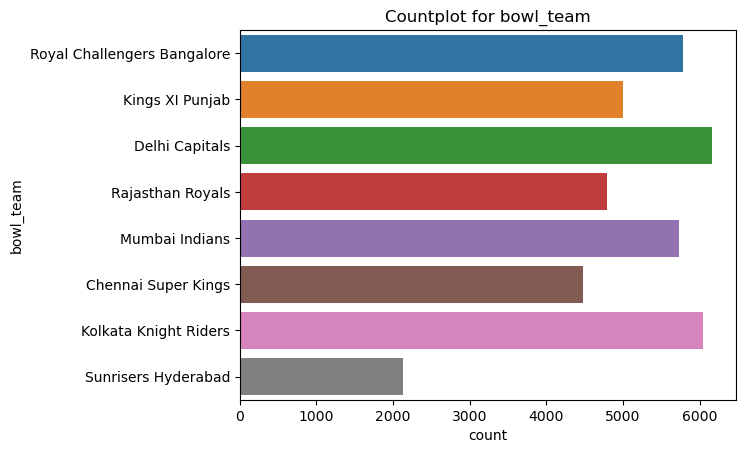

In [39]:
for i in cat_cols:
    sns.countplot(y=df[i])
    plt.title(f'Countplot for {i}')
    plt.show()

In [24]:
# for i in cat_cols:
#     bar3 = sns.countplot(y=df[i])

# for p in bar3.patches:
#      bar3.annotate('{:.2f}'.format(p.get_width()), (p.get_width() + 0.5, p.get_y() + p.get_height()/3),
#                 ha='center', va='center', fontsize=10, color='black')

# plt.title(f'Countplot for {i}')
# plt.show()

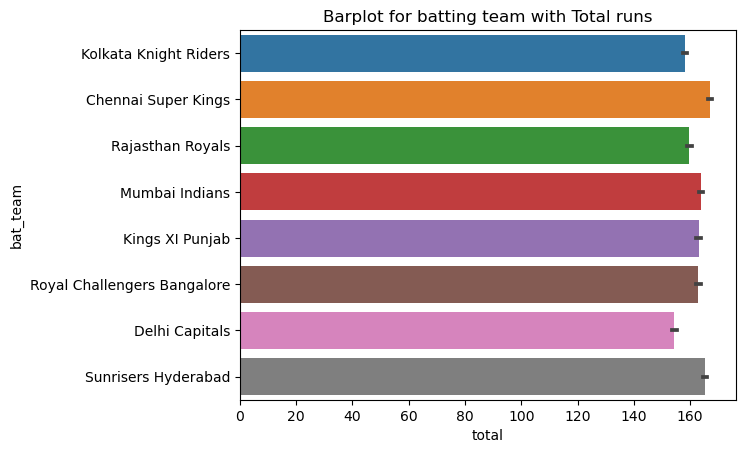

In [40]:
sns.barplot(x=df['total'],y=df['bat_team'])
plt.title(f'Barplot for batting team with Total runs')
plt.show() 

#### Inference
1) According to the data Chennai Super kings has scored highest runs 

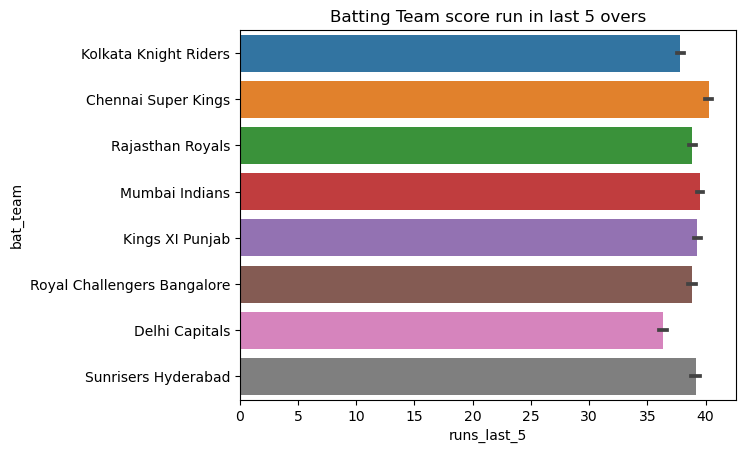

In [41]:
sns.barplot(x=df['runs_last_5'],y=df['bat_team'])
plt.title(f'Batting Team score run in last 5 overs')
plt.show()

### Inference
1) According to the data chennai Supper kings has score most runs on the last 5 overs

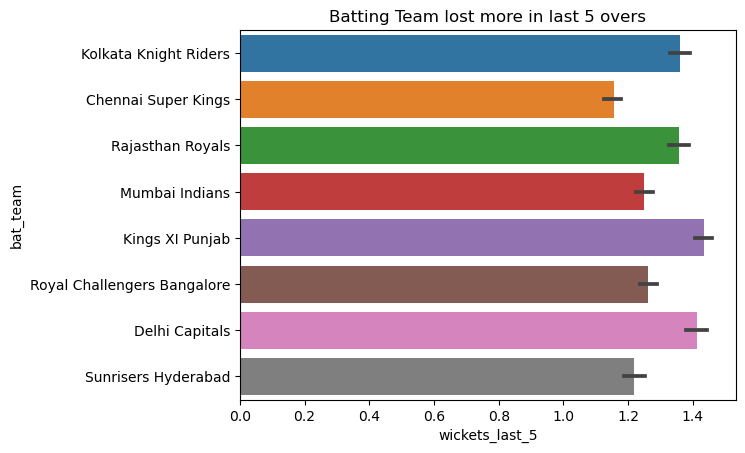

In [42]:
sns.barplot(x=df['wickets_last_5'],y=df['bat_team'])
plt.title(f'Batting Team lost more in last 5 overs')
plt.show()

### Inference
1) According to data Kings X1 Punjab has lost more wickets on last 5 overs compare to other teams

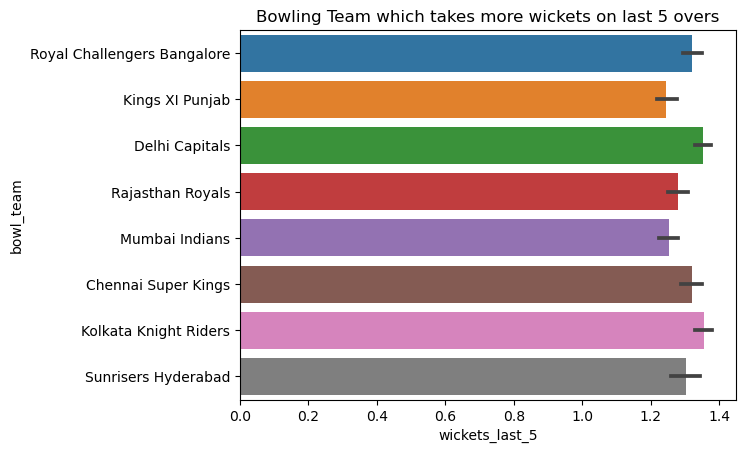

In [43]:
sns.barplot(x=df['wickets_last_5'],y=df['bowl_team'])
plt.title(f'Bowling Team which takes more wickets on last 5 overs')
plt.show()

#### Inference
1) According to the data Delhi capitals has take more wickets on last 5 overs 

In [29]:
print(num_cols)

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total'],
      dtype='object')


### Correlations

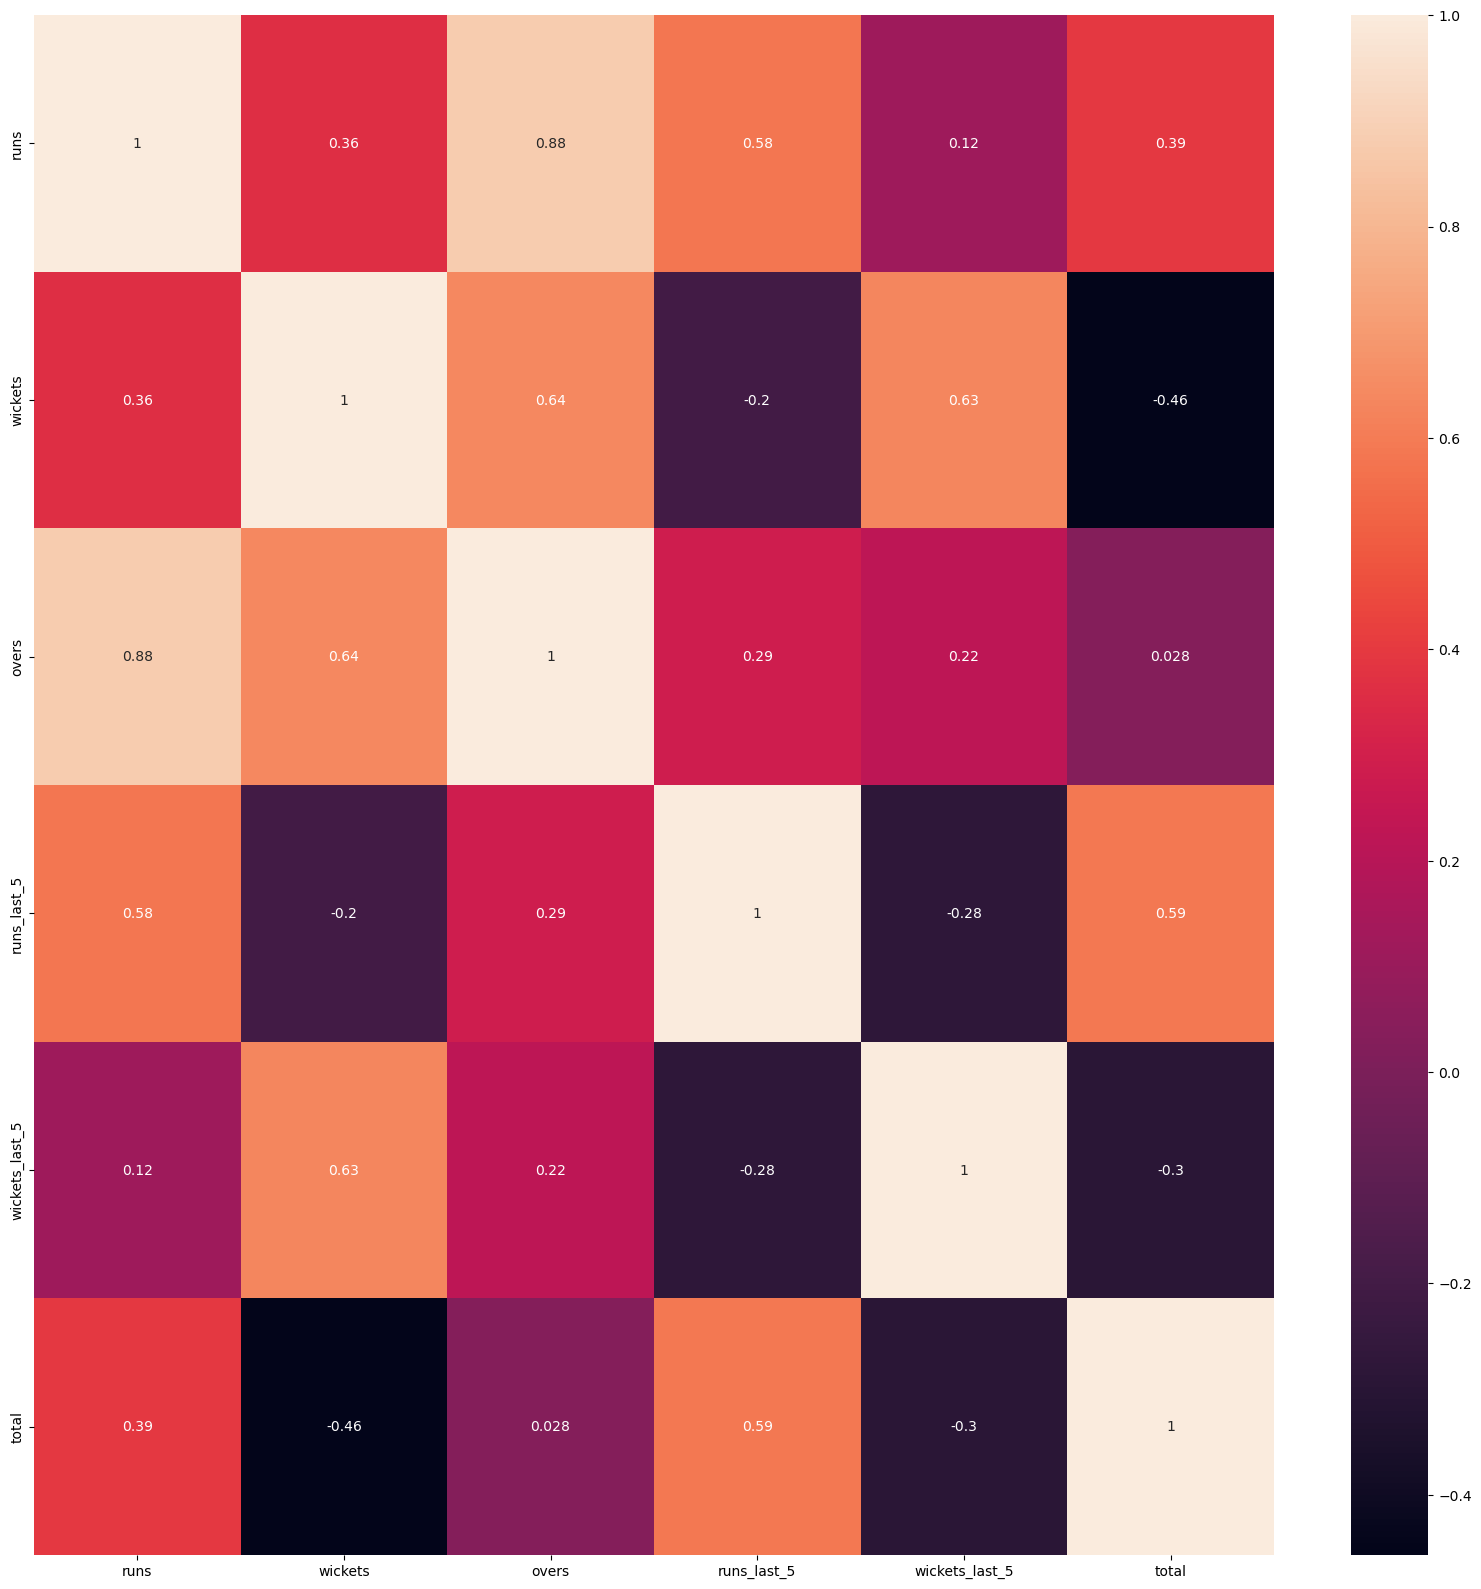

In [31]:
corr = df[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

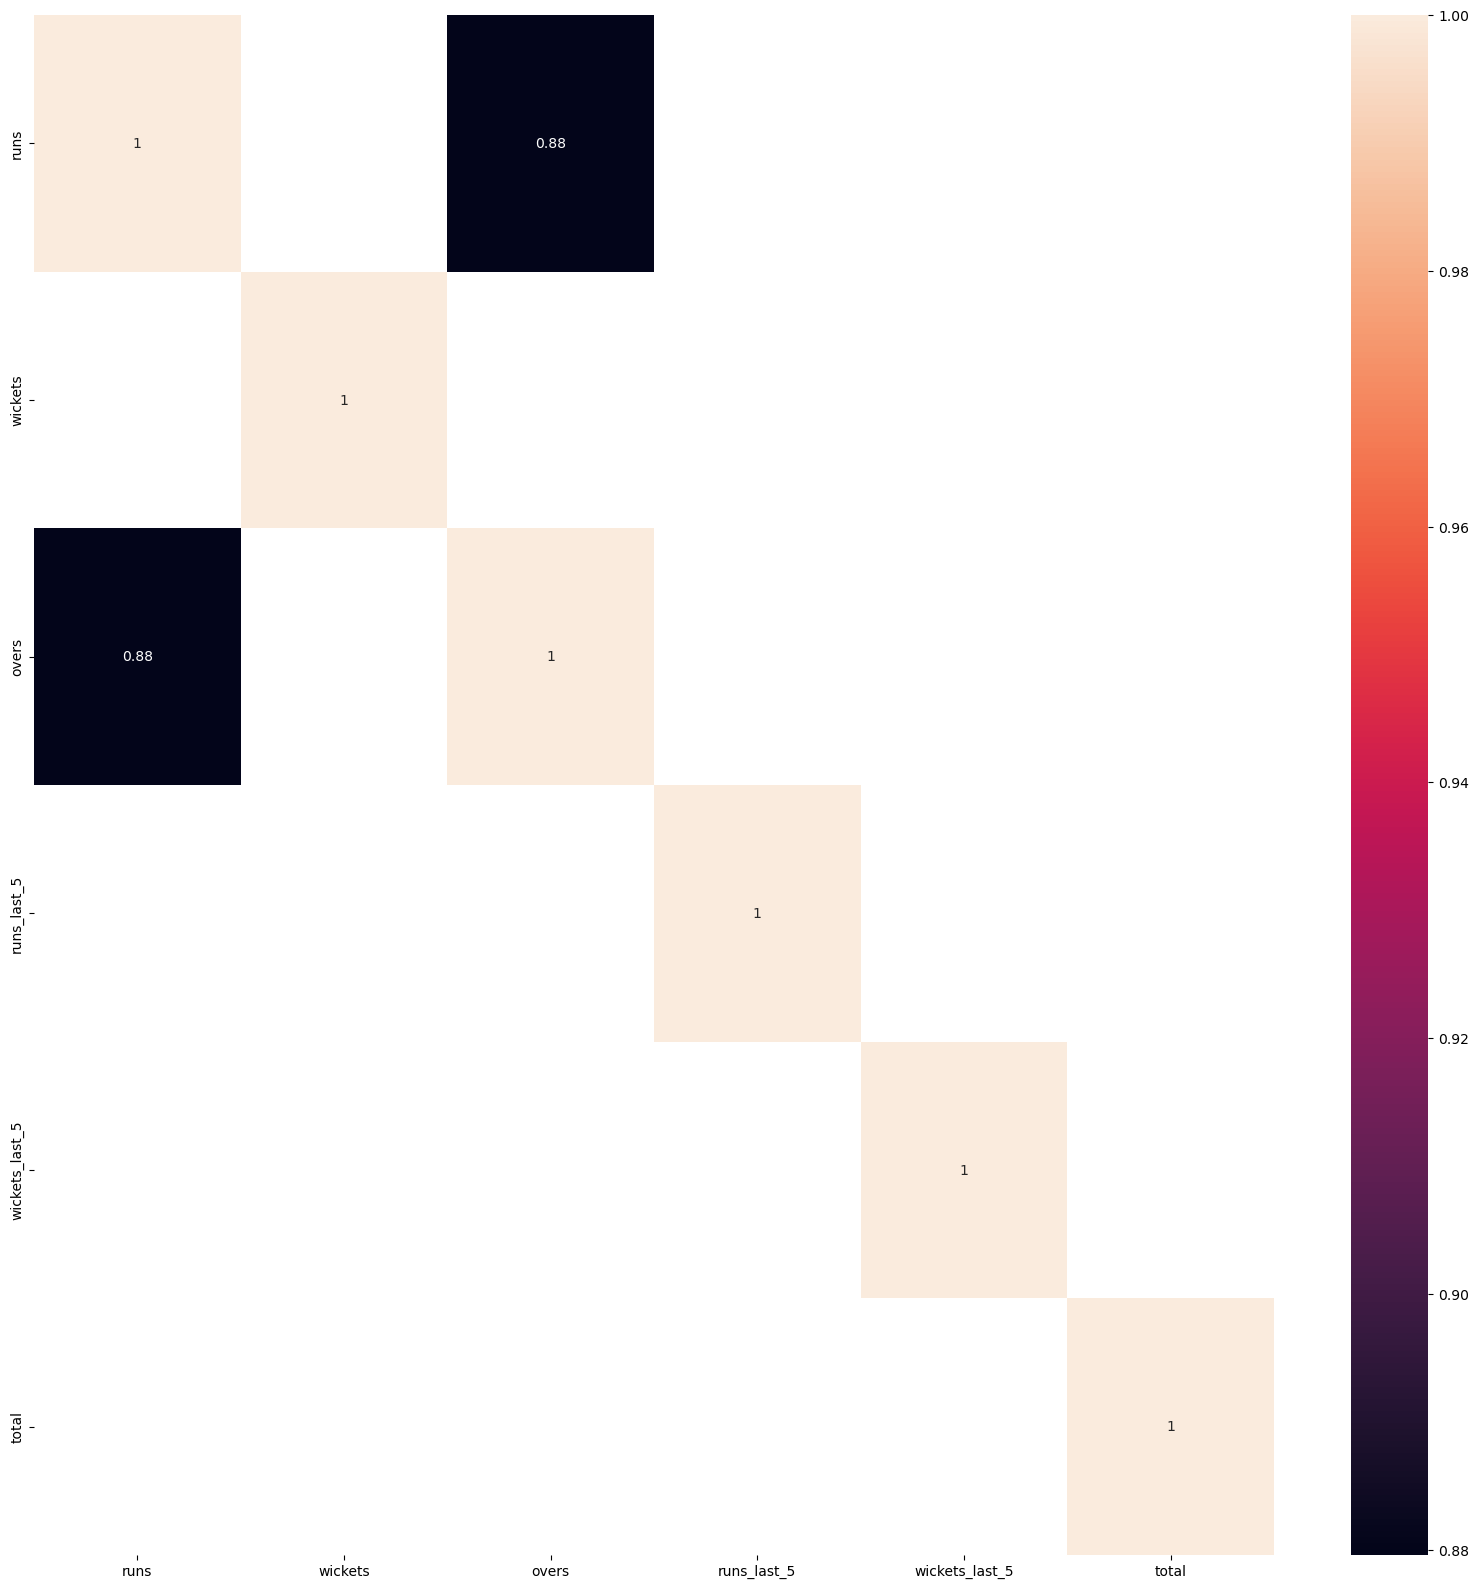

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()

#### Inference
1) There are 2 columns which are highly correlated like overs and runs

### Checking Outliers

In [71]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,99%,max
runs,40108.0,94.881620,40.566700,27.0,27.0,31.0,34.0,38.0,90.0,169.0,174.0,196.0,196.0
wickets,40108.0,3.032063,1.877177,0.0,0.0,0.0,0.0,0.0,3.0,7.0,7.0,8.0,8.0
overs,40108.0,12.313459,4.323001,5.0,5.1,5.2,5.3,5.5,12.3,19.2,19.3,19.6,19.6
runs_last_5,40108.0,38.839284,11.282216,16.0,16.0,18.0,20.0,22.0,38.0,59.0,61.0,70.0,70.0
wickets_last_5,40108.0,1.305326,1.034631,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,4.0
total,40108.0,162.045751,29.213888,92.0,92.0,97.0,106.0,113.0,163.0,209.0,212.0,231.0,231.0


### Treating Outliers

In [162]:
lower_end = ['runs','runs_last_5','total']
upper_end = ['runs','runs_last_5','total','wickets','wickets_last_5']

In [163]:
def outlier_treatment_le(x):     
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):       
    x = x.clip(upper=x.quantile(0.99))
    return x

In [164]:
df[lower_end] = df[lower_end].apply(outlier_treatment_le)
df[upper_end] = df[upper_end].apply(outlier_treatment_ue)

In [165]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,99%,max
runs,40108.0,94.881620,40.566700,27.0,27.0,31.0,34.0,38.0,90.0,169.0,174.0,196.0,196.0
wickets,40108.0,3.032063,1.877177,0.0,0.0,0.0,0.0,0.0,3.0,7.0,7.0,8.0,8.0
overs,40108.0,12.313459,4.323001,5.0,5.1,5.2,5.3,5.5,12.3,19.2,19.3,19.6,19.6
runs_last_5,40108.0,38.839284,11.282216,16.0,16.0,18.0,20.0,22.0,38.0,59.0,61.0,70.0,70.0
wickets_last_5,40108.0,1.305326,1.034631,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,4.0
total,40108.0,162.045751,29.213888,92.0,92.0,97.0,106.0,113.0,163.0,209.0,212.0,231.0,231.0


### Cheking tarket variable is normally distributed or not

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


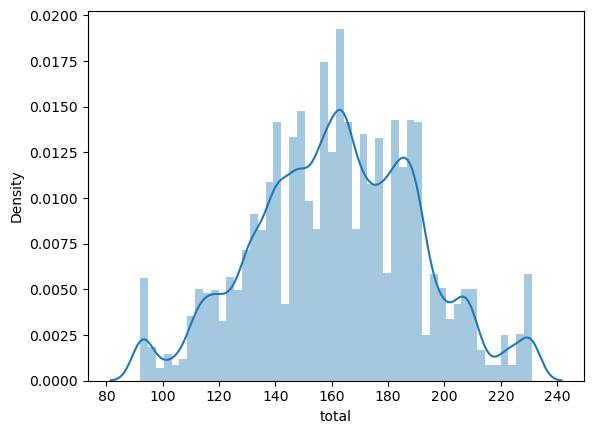

In [76]:
sns.distplot(df['total'])
plt.show()

### Inference
1) It is likely normally distributed

In [77]:
df.shape

(40108, 9)

### Encoding Catagorical Columns into Numerical Columns

In [78]:
encoded_df = pd.get_dummies(df,columns=cat_cols)

In [79]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61.0,0.0,5.1,59.0,0.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61.0,1.0,5.2,59.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61.0,1.0,5.3,59.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61.0,1.0,5.4,59.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61.0,1.0,5.5,58.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [81]:
# Rearranging the columns
encoded_df = encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [82]:
x_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
x_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]


In [83]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [84]:
# Removing the 'date' column
x_train.drop(labels='date', axis=True, inplace=True)
x_test.drop(labels='date', axis=True, inplace=True)

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [86]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    r2s = r2_score(ytest,ypred)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res, res_metrics

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [89]:
ypred_lr1 =  lr1.predict(x_test)


In [90]:
lr1_df,lr_res = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LinReg')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.653325,0.761155,212.887943,14.59068,11.439137


### Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [92]:
dt = DecisionTreeRegressor(max_depth=8,min_samples_split=10,min_samples_leaf=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=10)

In [93]:
ypred_dt = dt.predict(x_test)

In [94]:
dt_df,dt_res = model_res(dt,x_train,x_test,y_train,y_test,ypred_dt,'DTree_Reg')
dt_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree_Reg,0.681428,0.633268,326.877146,18.079744,14.501623


### Random Forest Regressor

In [95]:
rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_split=12)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=12, n_estimators=300)

In [96]:
ypred_rf =  rf.predict(x_test)

In [97]:
rf_df,rf_res = model_res(rf,x_train,x_test,y_train,y_test,ypred_rf,'RF_Reg')
rf_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.804863,0.700696,266.77705,16.333311,12.788311


In [142]:
rf2 = RandomForestRegressor(n_estimators=300,max_depth=9,min_samples_split=4)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=300)

In [143]:
ypred_rf1 =  rf.predict(x_test)

In [144]:
rf_df1,rf_re1s = model_res(rf2,x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg1')
rf_df1

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg1,0.768176,0.702813,266.77705,16.333311,12.788311


### Adaboost regressor

In [101]:
ada = AdaBoostRegressor(n_estimators=100,random_state=42)
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [102]:
ypred_ada = ada.predict(x_test)

In [103]:
ada_df,ada_res = model_res(ada,x_train,x_test,y_train,y_test,ypred_ada,'AdaBoost_Reg')
ada_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
AdaBoost_Reg,0.527755,0.540477,409.584173,20.238186,16.43247


### XGboost regressor

In [104]:
from xgboost import XGBRegressor

In [105]:
xgb1 = XGBRegressor()
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
ypred_xgb1 = xgb1.predict(x_test)

In [107]:
xgb_df,xgb_res = model_res(xgb1,x_train,x_test,y_train,y_test,ypred_xgb1,'XGBoost_Reg')
xgb_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGBoost_Reg,0.891509,0.652238,309.96901,17.605937,13.639315


In [108]:
all_res = pd.concat([lr1_df,dt_df,rf_df,ada_df,xgb_df,rf_df1])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.653325,0.761155,212.887943,14.590680,11.439137
DTree_Reg,0.681428,0.633268,326.877146,18.079744,14.501623
RF_Reg,0.804863,0.700696,266.777050,16.333311,12.788311
AdaBoost_Reg,0.527755,0.540477,409.584173,20.238186,16.432470
XGBoost_Reg,0.891509,0.652238,309.969010,17.605937,13.639315
RF_Reg1,0.766191,0.697858,266.777050,16.333311,12.788311


### Selecting the random Forest and doing best parameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [110]:
print(x_train.shape)

(37330, 21)


In [145]:
params_rf = {'n_estimators':[200,220,240,260,280,300,320,350,400,450,500],
            'max_depth':[9,10,11,12],
            'min_samples_split':[2,3,4,5]}

In [146]:
rf_base = RandomForestRegressor(random_state=42)
rs_rf1 = RandomizedSearchCV(estimator=rf_base,param_distributions= params_rf,scoring='r2',cv=5)
rs_rf1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [9, 10, 11, 12],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [200, 220, 240, 260,
                                                         280, 300, 320, 350,
                                                         400, 450, 500]},
                   scoring='r2')

In [147]:
print(rs_rf1.best_estimator_)
print(rs_rf1.best_params_)
print(rs_rf1.best_score_)

RandomForestRegressor(max_depth=9, min_samples_split=3, n_estimators=450,
                      random_state=42)
{'n_estimators': 450, 'min_samples_split': 3, 'max_depth': 9}
0.5721518505279832


In [148]:
rf2 = RandomForestRegressor(**rs_rf1.best_params_)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=3, n_estimators=450)

In [149]:
ypred_rf2 =  rf.predict(x_test)

In [150]:
rf_df2,rf_res2 = model_res(rf2,x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg2')
rf_df2

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg2,0.76753,0.701864,266.77705,16.333311,12.788311


In [151]:
all_res = pd.concat([lr1_df,dt_df,rf_df,ada_df,xgb_df,rf_df1,rf_df2])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.653325,0.761155,212.887943,14.590680,11.439137
DTree_Reg,0.681428,0.633268,326.877146,18.079744,14.501623
RF_Reg,0.804863,0.700696,266.777050,16.333311,12.788311
AdaBoost_Reg,0.527755,0.540477,409.584173,20.238186,16.432470
XGBoost_Reg,0.891509,0.652238,309.969010,17.605937,13.639315
RF_Reg1,0.768176,0.702813,266.777050,16.333311,12.788311
RF_Reg2,0.767530,0.701864,266.777050,16.333311,12.788311


### Inference - According to the result RF_Reg1 result which has minimul overfitting comparing to other models

#### Prediction of selected Model

In [161]:
actual_ypred_rf1 = ypred_rf1    

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_rf1})
res_df.sample(20)

,Actual_y_test,Pred
406,158.0,186.939073
1006,159.0,158.059897
2028,138.0,138.941075
2635,161.0,184.460219
920,168.0,170.310108
1466,160.0,185.614584
2649,161.0,166.995481
1839,162.0,167.889894
2569,173.0,176.066221
1846,162.0,164.441848


In [160]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-model.pkl'
pickle.dump(rf_df1, open(filename, 'wb'))